# Prediction of parking areas availability from parking dataset using AI/ML models

In [81]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [82]:
#Reading data
data_frame = pd.read_csv('dataset/parking_dataset.csv')

In [83]:
# View the given data
length_data_frame = len(data_frame)
print(f"The total number of records in the given dataset is: {length_data_frame}")
data_frame.head(length_data_frame)

The total number of records in the given dataset is: 146289


,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time
0,1,urn:entity:santander:parking:parkingSpot:3601,2017-10-18 09:57:04,2017-10-18 16:12:45,occupied,22541,2017-10-18 16:12:45
1,2,urn:entity:santander:parking:parkingSpot:3602,2017-10-18 09:57:02,2017-10-18 16:00:30,occupied,21808,2017-10-18 16:00:30
2,3,urn:entity:santander:parking:parkingSpot:3603,2017-10-18 09:24:10,2017-10-18 12:06:10,free,9720,2017-10-18 12:06:10
3,4,urn:entity:santander:parking:parkingSpot:3604,2017-10-18 09:22:30,2017-10-18 13:17:46,occupied,14116,2017-10-18 13:17:46
4,5,urn:entity:santander:parking:parkingSpot:3605,2017-10-18 10:01:12,2017-10-18 13:17:46,free,11794,2017-10-18 13:17:46
...,...,...,...,...,...,...,...
146284,147123,urn:entity:santander:parking:parkingSpot:3621,2018-05-20 07:20:13,2018-05-20 07:20:13,free,0,2018-05-20 07:14:28
146285,147124,urn:entity:santander:parking:parkingSpot:3745,2018-05-20 07:20:13,2018-05-20 07:20:13,occupied,0,2018-05-20 07:15:15
146286,147125,urn:entity:santander:parking:parkingSpot:3710,2018-05-20 07:25:24,2018-05-20 07:25:24,occupied,0,2018-05-20 07:20:06
146287,147126,urn:entity:santander:parking:parkingSpot:3904,2018-05-20 07:44:40,2018-05-20 07:44:40,occupied,0,2018-05-20 07:38:54


In [84]:
# Check the format of each column
data_frame.dtypes

row_id                 int64
parking_spot_id       object
start_time            object
end_time              object
status                object
duration               int64
last_updation_time    object
dtype: object

## Data Cleaning

### Remove additional substring from the 'parking_spot_id' column

In [85]:
data_frame['parking_spot_id'] = data_frame['parking_spot_id'].str.replace('urn:entity:santander:parking:parkingSpot:', '')
data_frame.head(length_data_frame)

,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time
0,1,3601,2017-10-18 09:57:04,2017-10-18 16:12:45,occupied,22541,2017-10-18 16:12:45
1,2,3602,2017-10-18 09:57:02,2017-10-18 16:00:30,occupied,21808,2017-10-18 16:00:30
2,3,3603,2017-10-18 09:24:10,2017-10-18 12:06:10,free,9720,2017-10-18 12:06:10
3,4,3604,2017-10-18 09:22:30,2017-10-18 13:17:46,occupied,14116,2017-10-18 13:17:46
4,5,3605,2017-10-18 10:01:12,2017-10-18 13:17:46,free,11794,2017-10-18 13:17:46
...,...,...,...,...,...,...,...
146284,147123,3621,2018-05-20 07:20:13,2018-05-20 07:20:13,free,0,2018-05-20 07:14:28
146285,147124,3745,2018-05-20 07:20:13,2018-05-20 07:20:13,occupied,0,2018-05-20 07:15:15
146286,147125,3710,2018-05-20 07:25:24,2018-05-20 07:25:24,occupied,0,2018-05-20 07:20:06
146287,147126,3904,2018-05-20 07:44:40,2018-05-20 07:44:40,occupied,0,2018-05-20 07:38:54


### Change Format of DataFrame

In [86]:
# Change date columns to datetime format
data_frame['start_time'] = pd.to_datetime(data_frame['start_time'])
data_frame['end_time'] = pd.to_datetime(data_frame['end_time'])
data_frame['last_updation_time'] = pd.to_datetime(data_frame['last_updation_time'])

In [87]:
# Change 'parking_spot_id' to integer
data_frame['parking_spot_id'] = data_frame['parking_spot_id'].astype(int)

In [88]:
# Check the format of each column
data_frame.dtypes

row_id                         int64
parking_spot_id                int64
start_time            datetime64[ns]
end_time              datetime64[ns]
status                        object
duration                       int64
last_updation_time    datetime64[ns]
dtype: object

### Exploratory Data Analysis 

In [89]:
# Exploratory data analysis for integer columns
data_frame.describe()

,row_id,parking_spot_id,duration
count,146289.000000,146289.000000,1.462890e+05
mean,73925.076533,3750.370964,5.526371e+04
std,42323.902318,102.522622,5.599374e+06
min,1.000000,3600.000000,0.000000e+00
25%,37411.000000,3655.000000,4.130000e+02
50%,73983.000000,3730.000000,1.815000e+03
75%,110555.000000,3860.000000,1.122300e+04
max,147127.000000,3923.000000,1.509438e+09


In [90]:
# Exploratory data analysis for date-time columns

time_columns = ['start_time', 'end_time', 'last_updation_time']
data_frame[time_columns] = data_frame[time_columns].apply(pd.to_datetime)

time_statistics = data_frame[time_columns].describe(datetime_is_numeric=True)

# To display all the rows for date-time columns
number_of_rows_to_display = len(time_statistics) 
time_statistics.head(number_of_rows_to_display)

,start_time,end_time,last_updation_time
count,146289,146289,146289
mean,2018-01-09 21:24:35.836713472,2018-01-10 12:45:43.852538368,2018-01-10 12:20:36.542337536
min,1970-01-01 01:00:08,1970-01-01 01:00:08,1970-01-01 01:00:08
25%,2017-11-25 04:02:40,2017-11-25 09:22:24,2017-11-25 08:50:25
50%,2017-12-31 06:52:34,2017-12-31 14:52:16,2017-12-31 14:43:05
75%,2018-02-12 13:31:17,2018-02-12 16:17:03,2018-02-12 16:11:28
max,2018-05-20 07:49:26,2018-05-20 07:49:26,2018-05-20 07:46:28


### Data was collected from October 2017 to May 2018 (Removing all other values)

In [91]:
# Counting the records with dates before October 2017
data_before_october = (data_frame[time_columns] < '2017-10-01').any(axis=1).sum()
print("Count of rows before October 2017:", data_before_october)

Count of rows before October 2017: 119


In [92]:
# Counting the records with dates after May 2018
data_after_may = (data_frame[time_columns] > '2018-05-30').any(axis=1).sum()
print("Count of rows after May 2018:", data_after_may)

Count of rows after May 2018: 0


In [93]:
# Setting a threshold and erasing records before october 2017 as these records are corrupt.

threshold_date = pd.Timestamp('2017-10-01')

# Creating a boolean mask for rows that meet the threshold
boolean_mask = (data_frame['start_time'] >= threshold_date) & \
       (data_frame['end_time'] >= threshold_date) & \
       (data_frame['last_updation_time'] >= threshold_date)

# Filter the DataFrame
filtered_data = data_frame[boolean_mask]

### Check for Missing and Null Values

There are no null values in the DataFrame.


<Axes: >

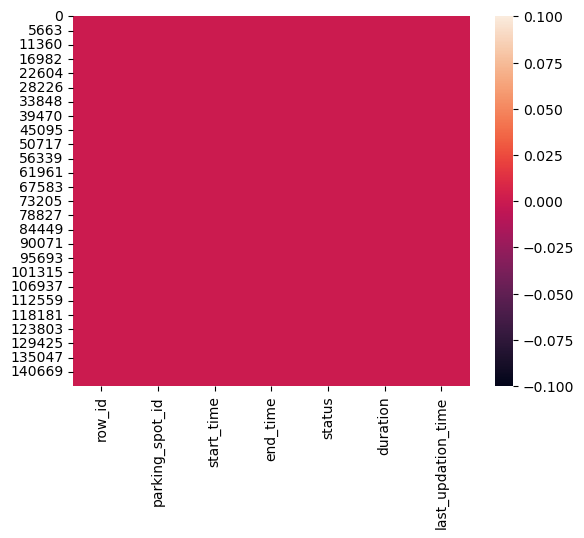

In [94]:
# Checking for null values and plotting them for visualisation 

check_data_null_values = filtered_data.isnull().any().any()

if check_data_null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

#Visualise all null values using SNS Heatmap for each column
all_columns=filtered_data.columns
sns.heatmap(filtered_data[all_columns].isnull())

In [95]:
# Checking for missing values
missing_data = filtered_data.isnull()
columns_with_missing_data = []

#Checking the records
for column in filtered_data.columns:

    # starting a counter for missing data (if found)
    column_missing_data = missing_data[column].value_counts()
    
    # Checking series with exactly two unique values (to check missing values)
    if len(column_missing_data) == 2:
        print(f"Column: {column}")
        print(column_missing_data)
        print("")
        columns_with_missing_data.append(column)

#If there is no missing data
if not columns_with_missing_data:
    print("None of the columns have missing values")

# Printing the missing data (if found)
else:
    print("These columns have missing data:")
    print(columns_with_missing_data)

None of the columns have missing values


### Outliers

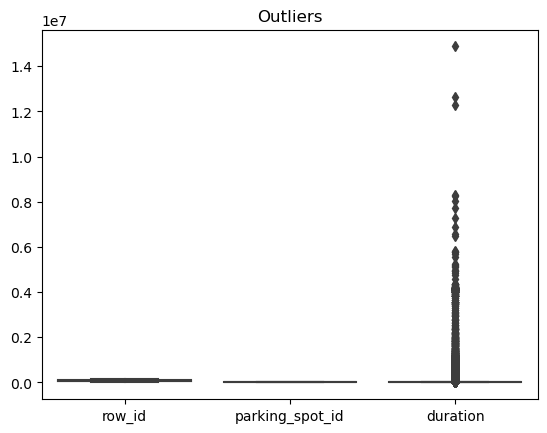

In [96]:
# Checking outliers in the dataframe
# Box plot to visualise outliers
sns.boxplot(filtered_data)
plt.title('Outliers')
plt.savefig('graphs/outliers.png') 
plt.show()

In [97]:
# Show the highest duraitons
sorted_time = filtered_data.sort_values(by='duration')
sorted_time.tail()

,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time
108432,109271,3763,2018-02-11 09:03:20,2018-05-17 20:01:54,occupied,8243914,2018-05-17 19:57:19
108433,109272,3764,2018-02-11 09:03:20,2018-05-18 12:44:38,occupied,8304078,2018-05-18 12:37:18
9719,10354,3617,2017-10-31 14:00:22,2018-03-22 13:54:03,occupied,12268421,2018-03-22 13:52:23
62168,63007,3616,2017-12-18 11:13:19,2018-05-13 20:45:34,occupied,12645135,2018-05-13 20:42:19
9846,10481,3755,2017-10-06 14:54:11,2018-03-27 20:07:24,occupied,14879593,2018-03-27 19:54:20


<Axes: >

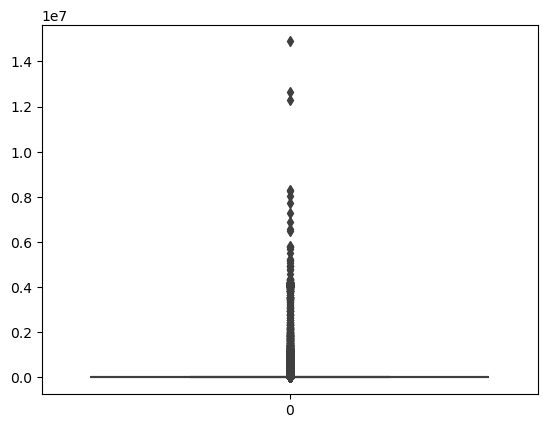

In [98]:
#Outliers observed in duration column due to construction problem as mentioned in the thesis
sns.boxplot(filtered_data['duration'])

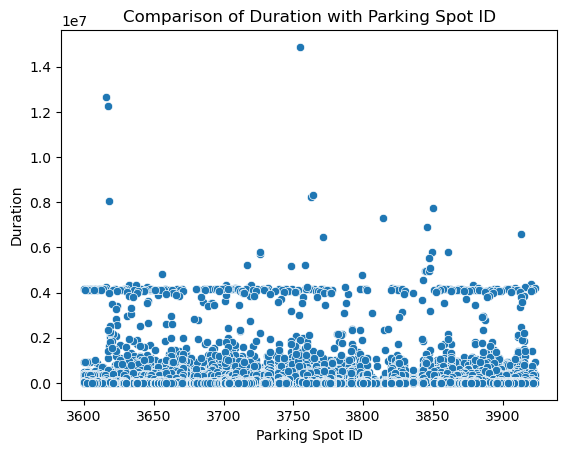

In [99]:
#Comparing outliners 'duration' for each 'parking_spot_id' using a scatterplot
sns.scatterplot(x='parking_spot_id', y='duration', data=filtered_data)
plt.xlabel('Parking Spot ID')
plt.ylabel('Duration')
plt.title('Comparison of Duration with Parking Spot ID')
plt.show()

## Visualising Data 

### Visualising Parking Status

In [100]:
# Calculating each status count
status_counts = filtered_data['status'].value_counts()
print(status_counts)

occupied    73302
free        72868
Name: status, dtype: int64


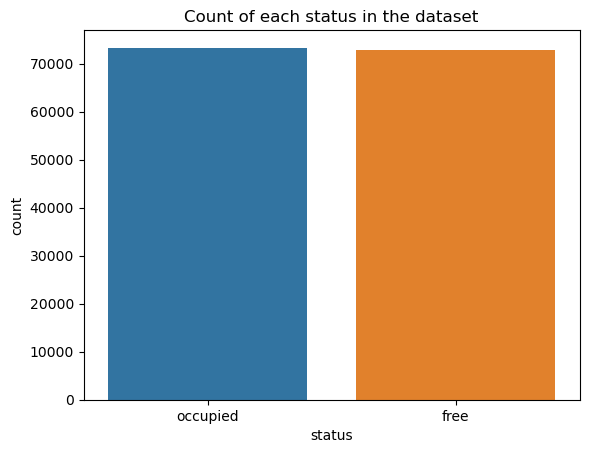

In [101]:
# Visualising count of each status
sns.countplot(x='status', data=filtered_data)
plt.title('Count of each status in the dataset')
plt.savefig('graphs/status.png') 
plt.show()

### Visualising Parking Id

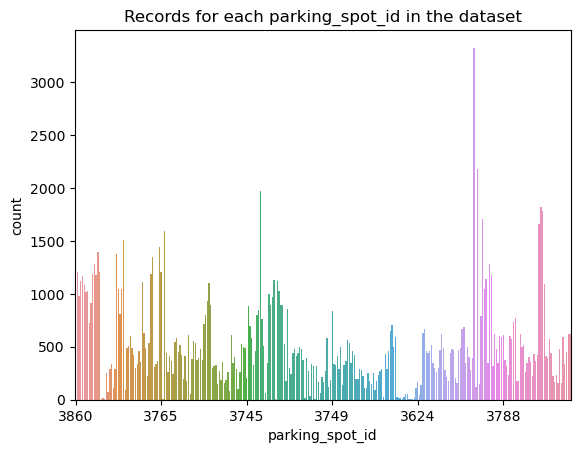

In [102]:
# Visualising count of occurrences for each parking_spot_id

# Sorting the records based on parking id
sorting_by_parking_id = filtered_data.sort_values(by='parking_spot_id')

# Plotting a countplot
sns.countplot(x='parking_spot_id', data=sorting_by_parking_id)


n = 50

# Get x-axis labels
labels = filtered_data['parking_spot_id'].value_counts().index

# Set the x-axis label by selecting every nth value for better visualisation
plt.xticks(range(0, len(labels), n), labels[::n])
plt.title('Records for each parking_spot_id in the dataset' )
plt.savefig('graphs/parking_id.png') 

plt.show()

In [103]:
# Calculating the count of occurrences of each parking_spot_id
parking_spot_count = filtered_data['parking_spot_id'].value_counts()

# Creating a new DataFrame to store the results
parking_spot_data = pd.DataFrame({
    'parking_spot_id': parking_spot_count.index,
    'spot_id_count': parking_spot_count.values, 
})

print(parking_spot_data)

     parking_spot_id  spot_id_count
0               3860           3323
1               3862           2180
2               3716           1973
3               3903           1822
4               3904           1784
..               ...            ...
285             3656              4
286             3618              4
287             3811              3
288             3812              3
289             3813              3

[290 rows x 2 columns]


In [104]:
# We can observe the records for few parking spots are less

#Calculating the count of count of parking_spot_id to understand about the dataset structure.
parking_count_of_count = parking_spot_data['spot_id_count'].value_counts()

# Creating a new DataFrame to store the results
count_parking_spot_data = pd.DataFrame({
    'spot_id_count': parking_count_of_count.index,
    'spot_id_count_of_occurance': parking_count_of_count.values, 
})

print(count_parking_spot_data)

     spot_id_count  spot_id_count_of_occurance
0              344                           4
1                3                           3
2              174                           3
3              291                           3
4              475                           2
..             ...                         ...
249            513                           1
250            509                           1
251            505                           1
252            501                           1
253            425                           1

[254 rows x 2 columns]


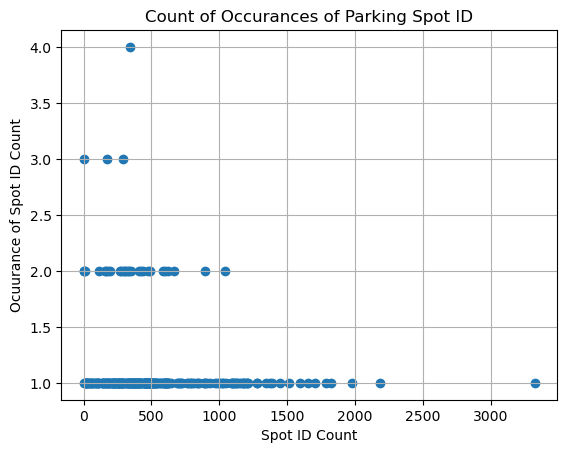

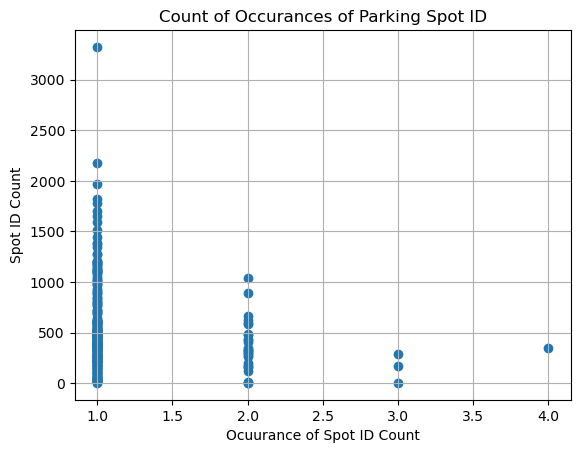

In [105]:
#Plot the graph and its inverse to visualise the count of occurances of parking_spot_ids
plt.scatter(count_parking_spot_data['spot_id_count'], count_parking_spot_data['spot_id_count_of_occurance'], marker='o')
plt.xlabel('Spot ID Count')
plt.ylabel('Ocuurance of Spot ID Count')
plt.title('Count of Occurances of Parking Spot ID')
plt.grid(True)
plt.show()
# Plotting the inverse graph
plt.scatter( count_parking_spot_data['spot_id_count_of_occurance'], count_parking_spot_data['spot_id_count'], marker='o')
plt.xlabel('Ocuurance of Spot ID Count')
plt.ylabel('Spot ID Count')
plt.title('Count of Occurances of Parking Spot ID')
plt.grid(True)
plt.show()

### Visualising end_time and last_updation_time

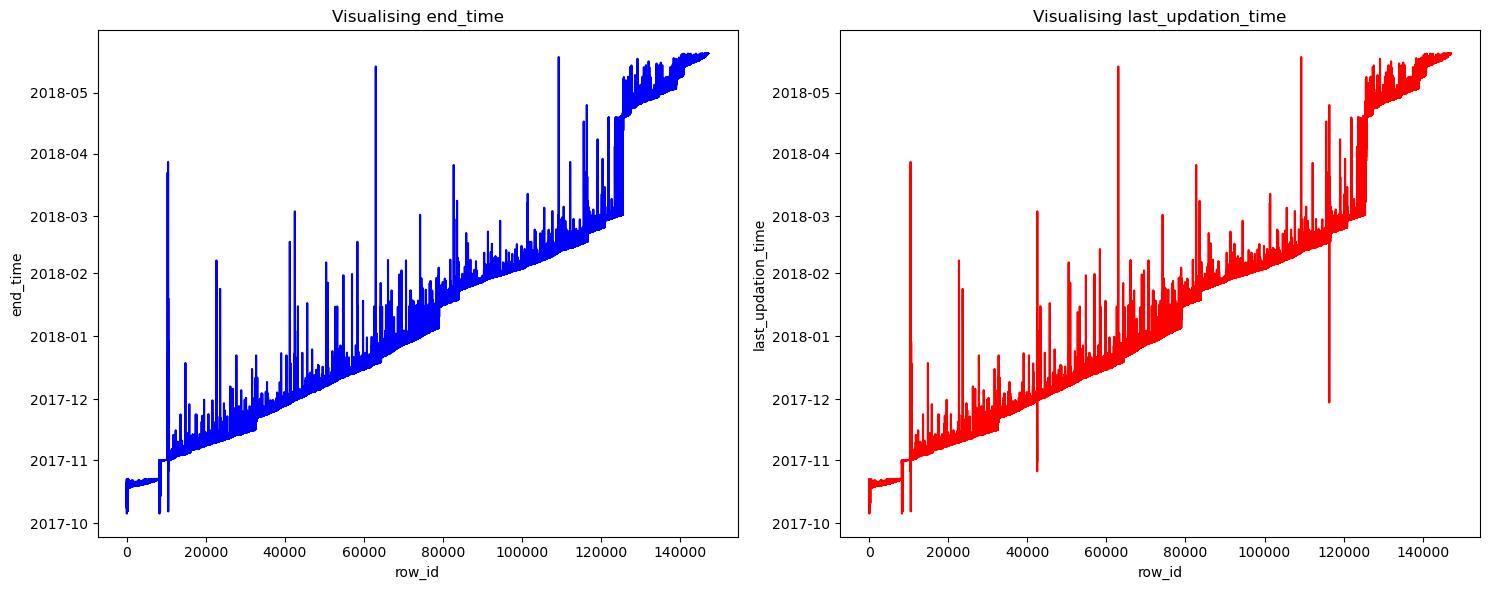

In [106]:
# Create a figure with two subplots side by side to visualise end_time and last_updation_time columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 'end_time' vs 'row_id' in the first subplot using Seaborn
sns.lineplot(x='row_id', y='end_time', data=filtered_data, ax=ax1, color='blue')
ax1.set_xlabel('row_id')
ax1.set_ylabel('end_time')
ax1.set_title('Visualising end_time')

# Plot 'last_updation_time' vs 'row_id' in the second subplot using Seaborn
sns.lineplot(x='row_id', y='last_updation_time', data=filtered_data, ax=ax2, color='red')
ax2.set_xlabel('row_id')
ax2.set_ylabel('last_updation_time')
ax2.set_title('Visualising last_updation_time')

# To prevent overlapping (adjusting the layouts)
plt.tight_layout()

# Show the plots
plt.show()

#### Compare end_time and last_updation_time graphs 

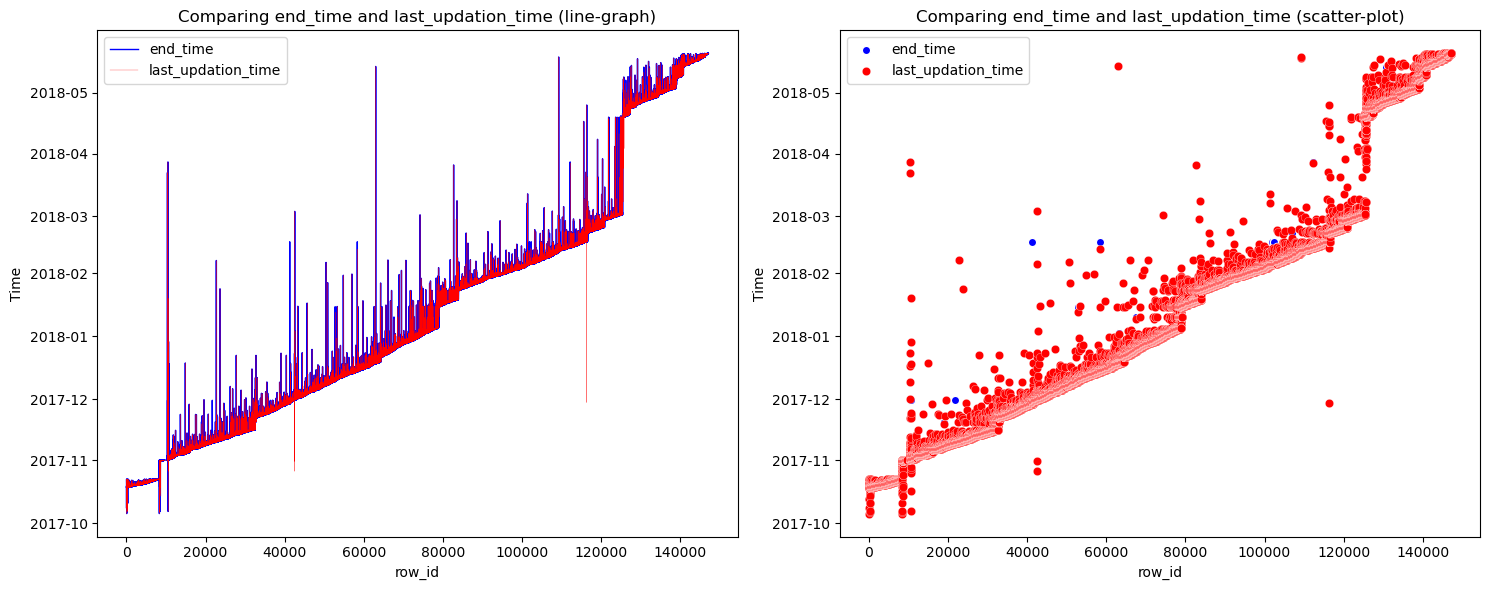

In [107]:
# Visualising end_time and last_updation time using line-graph and scatter-plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 'end_time' vs 'row_id' in blue
sns.lineplot(x='row_id', y='end_time', data=filtered_data, label='end_time', color='blue',  linewidth=1, ax=ax1)
# Plot 'last_updation_time' vs 'row_id' in red
sns.lineplot(x='row_id', y='last_updation_time', data=filtered_data, label='last_updation_time', color='red',  linewidth=0.2, ax=ax1)

ax1.set_xlabel('row_id')
ax1.set_ylabel('Time')
ax1.set_title('Comparing end_time and last_updation_time (line-graph)')

# Plot 'end_time' vs 'row_id' in blue
sns.scatterplot(x='row_id', y='end_time', data=filtered_data, label='end_time', color='blue',  linewidth=1, ax=ax2)
# Plot 'last_updation_time' vs 'row_id' in red
sns.scatterplot(x='row_id', y='last_updation_time', data=filtered_data, label='last_updation_time', color='red',  linewidth=0.2, ax=ax2)

ax2.set_xlabel('row_id')
ax2.set_ylabel('Time')
ax2.set_title('Comparing end_time and last_updation_time (scatter-plot)')

# Add legends
ax1.legend()
ax2.legend()

# Save the plot as one image with tight layout to ensure all subplots are included
plt.tight_layout()
plt.savefig('graphs/timeframe_parking_id.png') 

# Show the plot
plt.show()

In [108]:
# Analysis of duration is done inside of pre-processing below

## Data Pre-processing

### Pre-processing status columns

In [109]:
# Replace 'status' column values with 1 for 'occupied' and 0 for 'free'

filtered_data.loc[filtered_data['status'] == 'occupied', 'status'] = 1
filtered_data.loc[filtered_data['status'] == 'free', 'status'] = 0

filtered_data.head()

,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time
0,1,3601,2017-10-18 09:57:04,2017-10-18 16:12:45,1,22541,2017-10-18 16:12:45
1,2,3602,2017-10-18 09:57:02,2017-10-18 16:00:30,1,21808,2017-10-18 16:00:30
2,3,3603,2017-10-18 09:24:10,2017-10-18 12:06:10,0,9720,2017-10-18 12:06:10
3,4,3604,2017-10-18 09:22:30,2017-10-18 13:17:46,1,14116,2017-10-18 13:17:46
4,5,3605,2017-10-18 10:01:12,2017-10-18 13:17:46,0,11794,2017-10-18 13:17:46


### Pre-processing Time Columns

In [110]:
# While visualising last_updation_time and end_time we observed, there were few differences in their value. 

last_updation_time_different_to_end_time = filtered_data[filtered_data['last_updation_time'] != filtered_data['end_time']]

# Counting the number of records where there is a difference in value between these two parameters
count_rows = len(last_updation_time_different_to_end_time)

print(f"Number of records where 'last_updation_time' is different from 'end_time': {count_rows}")
last_updation_time_different_to_end_time.head()

Number of records where 'last_updation_time' is different from 'end_time': 131171


,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time
9718,10353,3616,2017-10-29 07:55:24,2017-12-17 13:38:09,1,4254165,2017-12-17 13:35:23
9719,10354,3617,2017-10-31 14:00:22,2018-03-22 13:54:03,1,12268421,2018-03-22 13:52:23
9726,10361,3624,2017-10-30 15:21:13,2017-11-08 12:30:02,1,767329,2017-11-08 12:28:20
9731,10366,3629,2017-10-31 12:57:40,2017-11-05 20:32:21,1,459281,2017-11-05 20:28:48
9741,10376,3639,2017-10-30 15:37:15,2017-11-05 17:57:12,1,526797,2017-11-05 03:16:54


In [111]:
#Create a new dataframe to have records of the difference values only and adding a column calculating the time difference between end_time and last_updation_time for these data

# Define a function to calculate the time difference in seconds
def calculate_time_difference(row):
    time_diff = abs((row['end_time'] - row['last_updation_time']).total_seconds())
    return time_diff

last_updation_time_different_to_end_time = last_updation_time_different_to_end_time.assign(time_difference=last_updation_time_different_to_end_time.apply(calculate_time_difference, axis=1))

# Display the DataFrame with the calculated time differences
last_updation_time_different_to_end_time.head()

,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time,time_difference
9718,10353,3616,2017-10-29 07:55:24,2017-12-17 13:38:09,1,4254165,2017-12-17 13:35:23,166.0
9719,10354,3617,2017-10-31 14:00:22,2018-03-22 13:54:03,1,12268421,2018-03-22 13:52:23,100.0
9726,10361,3624,2017-10-30 15:21:13,2017-11-08 12:30:02,1,767329,2017-11-08 12:28:20,102.0
9731,10366,3629,2017-10-31 12:57:40,2017-11-05 20:32:21,1,459281,2017-11-05 20:28:48,213.0
9741,10376,3639,2017-10-30 15:37:15,2017-11-05 17:57:12,1,526797,2017-11-05 03:16:54,52818.0


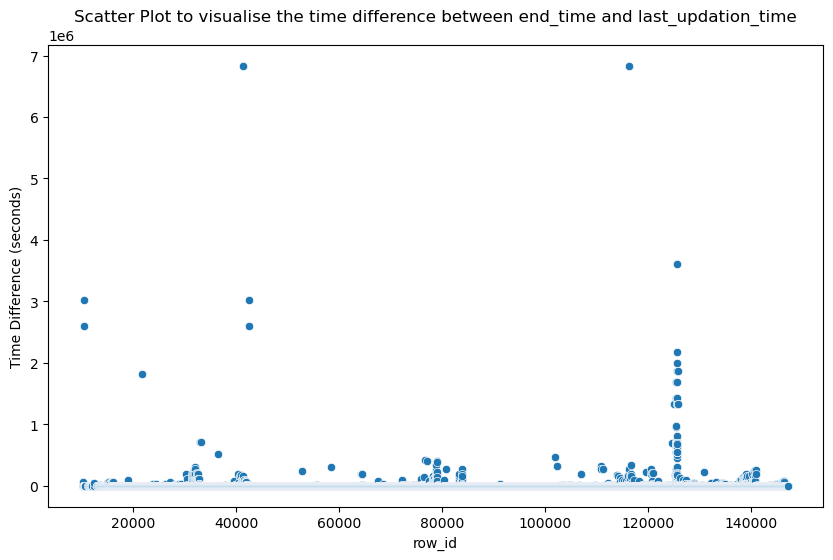

In [112]:
#Scatter plot to see outliers for time difference

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=last_updation_time_different_to_end_time, x='row_id', y='time_difference')

# Set labels and title
plt.xlabel('row_id')
plt.ylabel('Time Difference (seconds)')
plt.title('Scatter Plot to visualise the time difference between end_time and last_updation_time')
plt.savefig('graphs/time_difference.png') 
# Show the plot
plt.show()

In [113]:
# Sort the DataFrame by the "time_difference" column in ascending order
sorted_time_difference = last_updation_time_different_to_end_time.sort_values(by='time_difference', ascending=True)

# Display the highest time difference
sorted_time_difference.tail()

,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time,time_difference
9884,10519,3806,2017-10-25 15:52:12,2017-11-30 10:48:49,0,3095797,2017-10-26 12:07:26,3019283.0
124721,125560,3752,2018-03-03 08:45:42,2018-04-18 19:41:20,0,4010138,2018-03-08 03:29:33,3600707.0
124722,125561,3751,2018-03-03 09:35:45,2018-04-18 19:41:20,0,4007135,2018-03-08 03:25:05,3600975.0
115527,116366,3846,2018-02-16 12:13:11,2018-02-16 12:13:11,1,0,2017-11-29 08:42:23,6838248.0
40427,41266,3846,2017-11-28 17:31:13,2018-02-16 12:13:11,0,6892918,2017-11-29 08:42:23,6838248.0


In [114]:
# Filtering the data with time_difference greater than x minutes
x = 10;

more_than_x_minutes_time_difference = sorted_time_difference[sorted_time_difference['time_difference'] > x * 60]

# Count the rows in the filtered DataFrame
count_greater_than_x_minutes = len(more_than_x_minutes_time_difference)

# Display the count
print(f"Number of rows with time_difference > {x} minutes: {count_greater_than_x_minutes}")
more_than_x_minutes_time_difference.head()

Number of rows with time_difference > 10 minutes: 1892


,row_id,parking_spot_id,start_time,end_time,status,duration,last_updation_time,time_difference
54278,55117,3884,2017-12-11 23:04:12,2017-12-11 23:31:30,0,1638,2017-12-11 23:21:29,601.0
54147,54986,3903,2017-12-11 20:26:10,2017-12-11 20:35:36,0,566,2017-12-11 20:25:35,601.0
54456,55295,3749,2017-12-12 07:45:33,2017-12-12 08:14:18,0,1725,2017-12-12 08:04:17,601.0
55036,55875,3747,2017-12-12 17:11:18,2017-12-12 17:20:35,0,557,2017-12-12 17:10:34,601.0
54270,55109,3710,2017-12-11 22:54:30,2017-12-11 23:50:43,0,3373,2017-12-11 23:40:42,601.0


In [115]:
# Since we are only using end_time for our model. We are ignoring the last_updation_time column and can drop it for further pre-processing
filtered_data = filtered_data.drop(['last_updation_time'], axis=1)

In [116]:
# The structure of the data for further pre-processing
print("After removing last_updation_time column from the records")
filtered_data.head()

After removing last_updation_time column from the records


,row_id,parking_spot_id,start_time,end_time,status,duration
0,1,3601,2017-10-18 09:57:04,2017-10-18 16:12:45,1,22541
1,2,3602,2017-10-18 09:57:02,2017-10-18 16:00:30,1,21808
2,3,3603,2017-10-18 09:24:10,2017-10-18 12:06:10,0,9720
3,4,3604,2017-10-18 09:22:30,2017-10-18 13:17:46,1,14116
4,5,3605,2017-10-18 10:01:12,2017-10-18 13:17:46,0,11794


### Pre-Processing Duration

#### Removing rows with 0 duration of data

In [117]:
# Group parking_spot_id and calculate total duration
parking_spot_durations = filtered_data.groupby('parking_spot_id')['duration'].sum()

# Create a new DataFrame from the grouped data
spot_duration_data = parking_spot_durations.reset_index(name='total_duration')

# Sort the DataFrame by total_duration in ascending order
spot_duration_data = spot_duration_data.sort_values(by='total_duration')

# Find the parking spot with the least total duration
min_duration_spot = spot_duration_data.loc[spot_duration_data['total_duration'].idxmin()]

# Print the sorted DataFrame with total durations and the parking spot with the least duration
print("Parking Spot Durations (Sorted by Total Duration):")
print(spot_duration_data)

Parking Spot Durations (Sorted by Total Duration):
     parking_spot_id  total_duration
195             3811               0
197             3813               0
196             3812               0
191             3807          115504
192             3808          355922
..               ...             ...
281             3912        18505571
57              3663        18693238
208             3825        18709816
282             3913        18835562
183             3799        19093613

[290 rows x 2 columns]


In [118]:
# We can see that the id 3811,3812 and 3813 have 0 duration of data and we can remove all records of such data with 0 durations
x = filtered_data
print(f"The total number of records before: {len(x)}")
filtered_data = filtered_data[filtered_data['duration'] != 0]
print(f"The total number of records after removing all 0 duration records: {len(filtered_data)}")


The total number of records before: 146170
The total number of records after removing all 0 duration records: 145678


#### Manually Calculating duration to check for faulty calculations of duration

In [119]:
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

# Calculate the duration (time difference between end_time and start_time in seconds)
filtered_data['calculated_duration'] = (filtered_data['end_time'] - filtered_data['start_time']).dt.total_seconds()

# Checking whether calculated duration matches the given duration
filtered_data['duration_match'] = filtered_data['calculated_duration'] == filtered_data['duration']
filtered_data['duration_difference'] = abs(filtered_data['calculated_duration'] - filtered_data['duration'])

# Create a copy of the DataFrame
filtered_data = filtered_data.copy()

# Filter and display rows where duration_match is False
false_duration_rows = filtered_data.loc[filtered_data['duration_match'] == False]
print("Number of wrong durations calculated are: ", len(false_duration_rows))
false_duration_rows.head()


Number of wrong durations calculated are:  306


,row_id,parking_spot_id,start_time,end_time,status,duration,calculated_duration,duration_match,duration_difference
8266,8267,3617,2017-10-18 15:57:46,2017-10-31 13:07:19,1,1116573,1112973.0,False,3600.0
8269,8270,3620,2017-10-28 14:43:15,2017-10-31 20:19:08,1,282953,279353.0,False,3600.0
8286,8287,3637,2017-10-26 20:03:38,2017-10-31 18:25:13,1,429695,426095.0,False,3600.0
8287,8288,3638,2017-10-21 09:55:29,2017-10-31 15:46:40,1,888671,885071.0,False,3600.0
8322,8323,3674,2017-10-28 16:00:53,2017-11-01 00:33:41,1,293568,289968.0,False,3600.0


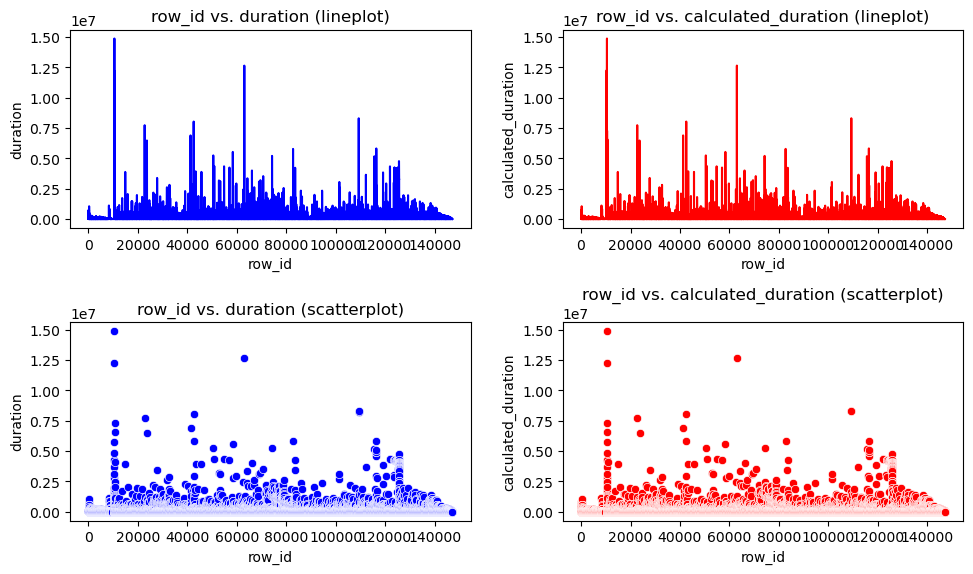

In [120]:
# Create a figure with four subplots in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Plot 'duration' vs 'row_id'
sns.lineplot(x='row_id', y='duration', data=filtered_data, ax=ax1, color='blue')
ax1.set_xlabel('row_id')
ax1.set_ylabel('duration')
ax1.set_title('row_id vs. duration (lineplot)')

# Plot 'calculated_duration' vs 'row_id'
sns.lineplot(x='row_id', y='calculated_duration', data=filtered_data, ax=ax2, color='red')
ax2.set_xlabel('row_id')
ax2.set_ylabel('calculated_duration')
ax2.set_title('row_id vs. calculated_duration (lineplot)')

# Plot 'duration' vs 'row_id'
sns.scatterplot(x='row_id', y='duration', data=filtered_data, ax=ax3, color='blue')
ax3.set_xlabel('row_id')
ax3.set_ylabel('duration')
ax3.set_title('row_id vs. duration (scatterplot)')

# Plot 'calculated_duration' vs 'row_id'
sns.scatterplot(x='row_id', y='calculated_duration', data=filtered_data, ax=ax4, color='red')
ax4.set_xlabel('row_id')
ax4.set_ylabel('calculated_duration')
ax4.set_title('row_id vs. calculated_duration (scatterplot)')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


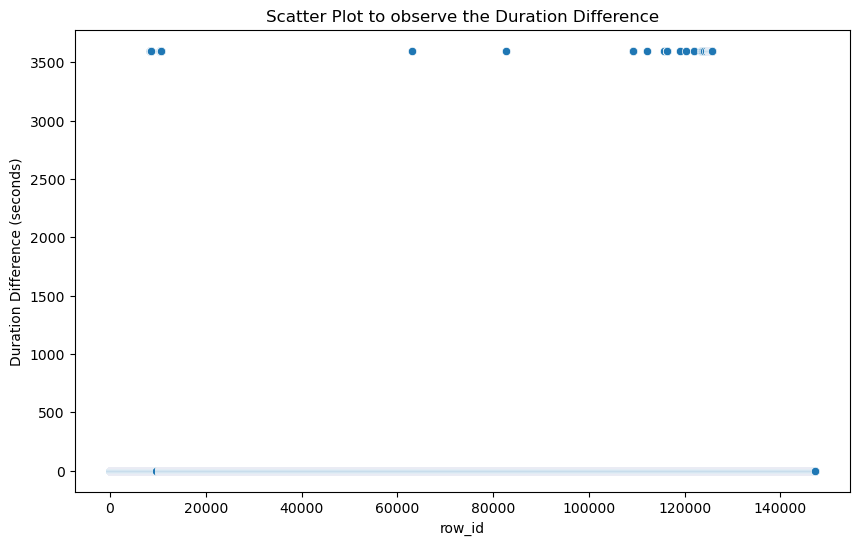

In [121]:
#Scatter plot to see outliers for duration difference 

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=filtered_data, x='row_id', y='duration_difference')

# Set labels and title
plt.xlabel('row_id')
plt.ylabel('Duration Difference (seconds)')
plt.title('Scatter Plot to observe the Duration Difference')
plt.savefig('graphs/duration_difference.png') 

# Show the plot
plt.show()

In [122]:
# Since all duration difference is exactly 3600s.
# We can conclude that at some point in the collection process the calculation was wrong. 
# So instead of removing these data from the data_frame we can conclude that calculation was wrong 
# And we can replace the calcualtions with the newly calulcated duration column

In [123]:
# Drop the 'duration' , 'duration_match'  and 'duration_difference' columns from the data_frame

filtered_data = filtered_data.drop(['duration', 'duration_match','duration_difference'], axis=1)
x = len(filtered_data)
print(f"Reduced Data after pre-processing has {x} rows")
filtered_data.head()

Reduced Data after pre-processing has 145678 rows


,row_id,parking_spot_id,start_time,end_time,status,calculated_duration
0,1,3601,2017-10-18 09:57:04,2017-10-18 16:12:45,1,22541.0
1,2,3602,2017-10-18 09:57:02,2017-10-18 16:00:30,1,21808.0
2,3,3603,2017-10-18 09:24:10,2017-10-18 12:06:10,0,9720.0
3,4,3604,2017-10-18 09:22:30,2017-10-18 13:17:46,1,14116.0
4,5,3605,2017-10-18 10:01:12,2017-10-18 13:17:46,0,11794.0


## Data Transformation 

### Sorting the data

In [124]:
# Sort the DataFrame based on 'parking_spot_id'
filtered_data_sorted = filtered_data.sort_values(by='parking_spot_id')

# Group the DataFrame by 'parking_spot_id'
grouped = filtered_data_sorted.groupby('parking_spot_id')

# Create an empty list to store sorted group DataFrames
sorted_groups = []

# Iterate through groups, sort by 'start_time', and append to the list
for group_name, group_data in grouped:
    sorted_group = group_data.sort_values(by='start_time')
    sorted_groups.append(sorted_group)

# Concatenate the sorted groups back into a DataFrame
sorted_data_frame = pd.concat(sorted_groups, ignore_index=True)

x= len(sorted_data_frame)
# Display the sorted DataFrame
sorted_data_frame.head(x)

,row_id,parking_spot_id,start_time,end_time,status,calculated_duration
0,97,3600,2017-10-18 10:40:22,2017-10-18 16:12:42,1,19940.0
1,923,3600,2017-10-18 16:12:42,2017-10-18 16:23:46,0,664.0
2,961,3600,2017-10-18 16:23:46,2017-10-19 00:32:50,1,29344.0
3,1503,3600,2017-10-19 00:32:50,2017-10-19 06:53:31,0,22841.0
4,1663,3600,2017-10-19 06:53:31,2017-10-19 07:00:15,1,404.0
...,...,...,...,...,...,...
145673,146286,3923,2018-05-18 12:59:08,2018-05-19 20:04:56,1,111948.0
145674,146867,3923,2018-05-19 20:04:56,2018-05-19 20:09:43,0,287.0
145675,146868,3923,2018-05-19 20:09:43,2018-05-19 21:24:51,1,4508.0
145676,146901,3923,2018-05-19 21:24:51,2018-05-19 21:29:38,0,287.0


### Working with Gaps in the data

In [125]:
# Iterate through the DataFrame to update "end_time" and calculate "new_duration"
count = 0;
for i in range(len(sorted_data_frame) - 1):
    current_row = sorted_data_frame.iloc[i]
    next_row = sorted_data_frame.iloc[i + 1]
    
    # Check if the parking ids are the same
    if current_row['parking_spot_id'] == next_row['parking_spot_id']:
        
        # Check if "end_time" is not the same as the next row's "start_time"        
        if current_row['end_time'] != next_row['start_time']:
            count = count+1
            
# Reset the index
sorted_data_frame.reset_index(drop=True, inplace=True)

print(f" There are {count} gaps in the data")

 There are 280 gaps in the data


### Solving Gaps Issue

In [126]:
import random
new_rows = []

# Iterate through the DataFrame to find gaps and fill them
for i in range(len(sorted_data_frame) - 1):
    current_row = sorted_data_frame.iloc[i]
    next_row = sorted_data_frame.iloc[i + 1]
    
    # Only for same parking ids as the time will be different when id changes as the data is sorted based on id
    if current_row['parking_spot_id'] == next_row['parking_spot_id']:
        
        # Check if "end_time" of current row is not the same as the next row's "start_time"
        if current_row['end_time'] != next_row['start_time']:
            
            # Fill the gap by generating a new row right between current_row and next_row
            start_time = current_row['end_time']
            end_time = next_row['start_time']
            duration = abs((end_time - start_time)).total_seconds()
            
            # Randomise the status choice (0 or 1)
            status = random.choice([0, 1])
            
            # Create the new row
            new_row = {
                'parking_spot_id': current_row['parking_spot_id'],
                'start_time': start_time,
                'end_time': end_time,
                'status': status,
                'calculated_duration': duration
            }
            
            # Insert the new row between current_row and next_row of gaps
            sorted_data_frame = pd.concat([sorted_data_frame.iloc[:i + 1], pd.DataFrame([new_row]), sorted_data_frame.iloc[i + 1:]], ignore_index=True)

In [127]:
# Iterate through the DataFrame to check if there still are any gaps
count = 0;
for i in range(len(sorted_data_frame) - 1):
    current_row = sorted_data_frame.iloc[i]
    next_row = sorted_data_frame.iloc[i + 1]
    
    # Check if the parking ids are the same
    if current_row['parking_spot_id'] == next_row['parking_spot_id']:
        
        # Check if "end_time" is not the same as the next row's "start_time"        
        if current_row['end_time'] != next_row['start_time']:
            count = count+1
            
# Reset the index
sorted_data_frame.reset_index(drop=True, inplace=True)

if(count==0):
    print(f" There are no gaps in the data after modification")
else:
    print(f" There are {count} gaps in the data")
    
# Print the modified DataFrame
sorted_data_frame.head(len(sorted_data_frame))


 There are no gaps in the data after modification


,row_id,parking_spot_id,start_time,end_time,status,calculated_duration
0,97.0,3600,2017-10-18 10:40:22,2017-10-18 16:12:42,1,19940.0
1,923.0,3600,2017-10-18 16:12:42,2017-10-18 16:23:46,0,664.0
2,961.0,3600,2017-10-18 16:23:46,2017-10-19 00:32:50,1,29344.0
3,1503.0,3600,2017-10-19 00:32:50,2017-10-19 06:53:31,0,22841.0
4,1663.0,3600,2017-10-19 06:53:31,2017-10-19 07:00:15,1,404.0
...,...,...,...,...,...,...
145953,146286.0,3923,2018-05-18 12:59:08,2018-05-19 20:04:56,1,111948.0
145954,146867.0,3923,2018-05-19 20:04:56,2018-05-19 20:09:43,0,287.0
145955,146868.0,3923,2018-05-19 20:09:43,2018-05-19 21:24:51,1,4508.0
145956,146901.0,3923,2018-05-19 21:24:51,2018-05-19 21:29:38,0,287.0


In [128]:
# Drop uneccessary rows to prepare for transformation
sorted_data_frame = sorted_data_frame.drop(['calculated_duration','row_id'], axis=1)

### Defining a function to set a threshold percentage and arrange the data based on the minute intervals 

In [129]:
def arrange_data_by_interval_threshold(df, interval_minutes, threshold_percent):
    
    # Time interval in seconds
    interval_seconds = interval_minutes * 60
    
    # List to store the rearranged data
    rearranged_data = []
    
    for index, row in df.iterrows():
        current_start_time = row['start_time']
        current_end_time = row['end_time']
        current_status = row['status']
        parking_spot_id = row['parking_spot_id'] 
        
        # Initialize interval status
        interval_status = current_status
        
        while current_start_time < current_end_time:
            interval_end_time = current_start_time + pd.Timedelta(seconds=interval_seconds)
            
            # Minimum required time calculation for the status to be considered same
            min_required_time_seconds = interval_seconds * (threshold_percent / 100)
            
            interval_start_time = max(current_start_time, interval_end_time - pd.Timedelta(seconds=min_required_time_seconds))
            
            # Total time a current status was present in the interval
            status_time = min(interval_end_time, current_end_time) - max(current_start_time, interval_start_time)
            
            if status_time.total_seconds() >= min_required_time_seconds:
                # If status time is greater than or equal to the threshold, use current status
                interval_status = current_status
            else:
                # If the status time is less than the threshold, use the compliment
                interval_status = 1 - current_status
            
            rearranged_data.append({
                'parking_spot_id': parking_spot_id,
                'start_time': current_start_time.strftime('%Y-%m-%d %H:%M'),
                'end_time': interval_end_time.strftime('%Y-%m-%d %H:%M'),
                'status': interval_status
            })
            
            current_start_time = interval_end_time
    
    # Create a new DataFrame from the rearranged data
    rearranged_df = pd.DataFrame(rearranged_data)
    
    return rearranged_df

# Example usage:
result_df = arrange_data_by_interval_threshold(sorted_data_frame, interval_minutes=20, threshold_percent=80)
result_df.head(1047)


,parking_spot_id,start_time,end_time,status
0,3600,2017-10-18 10:40,2017-10-18 11:00,1
1,3600,2017-10-18 11:00,2017-10-18 11:20,1
2,3600,2017-10-18 11:20,2017-10-18 11:40,1
3,3600,2017-10-18 11:40,2017-10-18 12:00,1
4,3600,2017-10-18 12:00,2017-10-18 12:20,1
...,...,...,...,...
1042,3600,2017-11-01 09:52,2017-11-01 10:12,1
1043,3600,2017-11-01 10:12,2017-11-01 10:32,1
1044,3600,2017-11-01 10:32,2017-11-01 10:52,1
1045,3600,2017-11-01 10:52,2017-11-01 11:12,1


## Feature Engineering

In [130]:
# Convert 'start_time' and 'end_time' to datetime objects
result_df['start_time'] = pd.to_datetime(result_df['start_time'])
result_df['end_time'] = pd.to_datetime(result_df['end_time'])

# Extract date and time features
result_df['hour_of_day'] = result_df['start_time'].dt.hour
result_df['day_of_week'] = result_df['start_time'].dt.dayofweek
result_df['month'] = result_df['start_time'].dt.month
result_df['year'] = result_df['start_time'].dt.year

# Calculate duration in minutes
result_df['duration_minutes'] = (result_df['end_time'] - result_df['start_time']).dt.total_seconds() / 60

# Create a weekend/weekday indicator
result_df['is_weekend'] = result_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the updated DataFrame
result_df.head(len(result_df))


,parking_spot_id,start_time,end_time,status,hour_of_day,day_of_week,month,year,duration_minutes,is_weekend
0,3600,2017-10-18 10:40:00,2017-10-18 11:00:00,1,10,2,10,2017,20.0,0
1,3600,2017-10-18 11:00:00,2017-10-18 11:20:00,1,11,2,10,2017,20.0,0
2,3600,2017-10-18 11:20:00,2017-10-18 11:40:00,1,11,2,10,2017,20.0,0
3,3600,2017-10-18 11:40:00,2017-10-18 12:00:00,1,11,2,10,2017,20.0,0
4,3600,2017-10-18 12:00:00,2017-10-18 12:20:00,1,12,2,10,2017,20.0,0
...,...,...,...,...,...,...,...,...,...,...
4024522,3923,2018-05-19 21:29:00,2018-05-19 21:49:00,1,21,5,5,2018,20.0,1
4024523,3923,2018-05-19 21:49:00,2018-05-19 22:09:00,1,21,5,5,2018,20.0,1
4024524,3923,2018-05-19 22:09:00,2018-05-19 22:29:00,1,22,5,5,2018,20.0,1
4024525,3923,2018-05-19 22:29:00,2018-05-19 22:49:00,1,22,5,5,2018,20.0,1


## AI/ML Models

### LSTM

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [132]:
# Load the data
df = result_df 

# Make 'status' as the target variable for LSTM
target_variable_lstm = 'status'

# Encode date-time columns to numerical values
le = LabelEncoder()
df['start_time'] = le.fit_transform(df['start_time'])
df['end_time'] = le.fit_transform(df['end_time'])

# Define features (X) and target variable (y) for LSTM
X_lstm = df.drop(columns=[target_variable_lstm])
y_lstm = df[target_variable_lstm]


In [133]:
# Split the data into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Scale features to the range [0, 1] for LSTM
scaler_lstm = MinMaxScaler()
X_train_lstm = scaler_lstm.fit_transform(X_train_lstm)
X_test_lstm = scaler_lstm.transform(X_test_lstm)

# Reshape data for LSTM input (samples, time steps, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])

In [134]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(units=1, activation='sigmoid'))

In [135]:
# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
# Train the LSTM model
history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/10
100614/100614 [==============================] - 66s 658us/step - loss: 0.4935 - accuracy: 0.7776 - val_loss: 0.4948 - val_accuracy: 0.7785
Epoch 2/10
100614/100614 [==============================] - 65s 642us/step - loss: 0.4925 - accuracy: 0.7781 - val_loss: 0.4917 - val_accuracy: 0.7789
Epoch 3/10
100614/100614 [==============================] - 64s 641us/step - loss: 0.4916 - accuracy: 0.7784 - val_loss: 0.4904 - val_accuracy: 0.7799
Epoch 4/10
100614/100614 [==============================] - 64s 638us/step - loss: 0.4910 - accuracy: 0.7787 - val_loss: 0.4928 - val_accuracy: 0.7733
Epoch 5/10
100614/100614 [==============================] - 67s 664us/step - loss: 0.4905 - accuracy: 0.7787 - val_loss: 0.4894 - val_accuracy: 0.7788
Epoch 6/10
100614/100614 [==============================] - 66s 652us/step - loss: 0.4900 - accuracy: 0.7788 - val_loss: 0.4891 - val_accuracy: 0.7798
Epoch 7/10
100614/100614 [==============================] - 66s 658us/step - loss: 0.4895 - ac

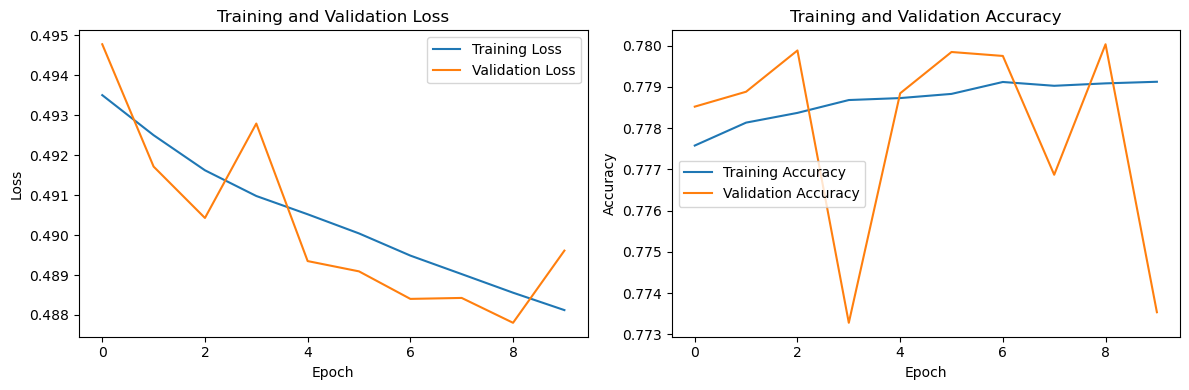

In [140]:
# Access the training history
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [142]:
# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f'LSTM Test Loss: {loss_lstm}, Test Accuracy: {accuracy_lstm}')



25154/25154 [==============================] - 9s 354us/step - loss: 0.4896 - accuracy: 0.7735
LSTM Test Loss: 0.48961207270622253, Test Accuracy: 0.7735375165939331


In [143]:
# Predictions for LSTM
y_pred_lstm = model_lstm.predict(X_test_lstm)


# Evaluate the model's performance
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
r2 = r2_score(y_test_lstm, y_pred_lstm)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

25154/25154 [==============================] - 8s 301us/step
Mean Squared Error (MSE): 0.16115385350389105
R-squared: 0.3256375515951768


In [144]:
# Generate confusion matrices for lstm
conf_matrix_lstm = confusion_matrix(y_test_lstm, (y_pred_lstm > 0.5).astype(int))
print('Confusion Matrix LSTM:')
print(conf_matrix_lstm)

Confusion Matrix LSTM:
[[166073 151854]
 [ 30427 456552]]


In [145]:
# Generate classification reports for lstm
class_report_lstm = classification_report(y_test_lstm, (y_pred_lstm > 0.5).astype(int))
print('Classification Report:')
print(class_report_lstm)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.52      0.65    317927
           1       0.75      0.94      0.83    486979

    accuracy                           0.77    804906
   macro avg       0.80      0.73      0.74    804906
weighted avg       0.79      0.77      0.76    804906



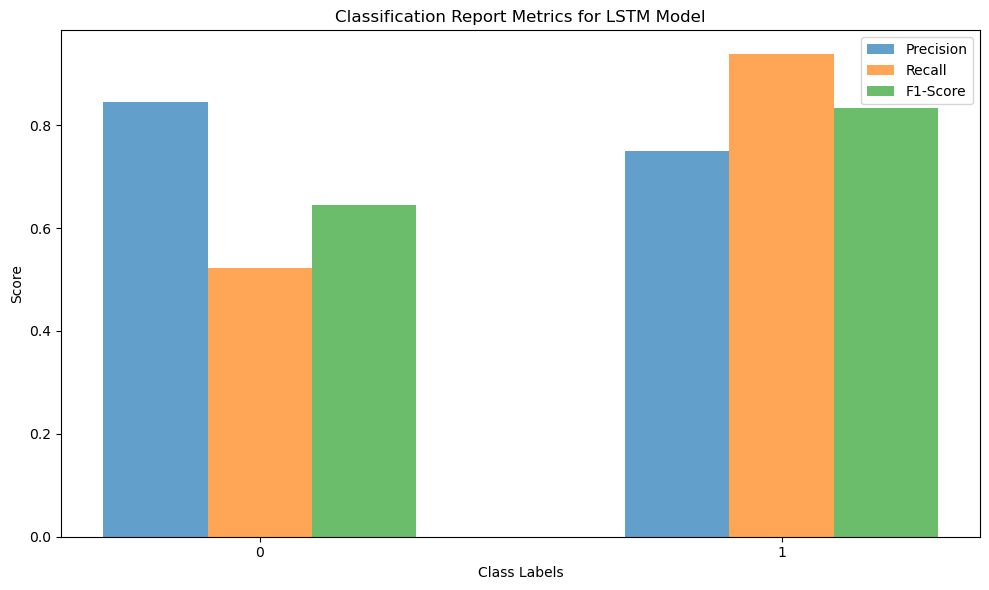

In [146]:
# Generate classification report for LSTM
class_report_lstm = classification_report(y_test_lstm, (y_pred_lstm > 0.5).astype(int), output_dict=True)

# Extract precision, recall, and f1-score values
labels = list(class_report_lstm.keys())[:-3] 
precision = [class_report_lstm[label]['precision'] for label in labels]
recall = [class_report_lstm[label]['recall'] for label in labels]
f1_score = [class_report_lstm[label]['f1-score'] for label in labels]

# Create a bar chart to visualize precision, recall, and f1-score
plt.figure(figsize=(10, 6))
x = range(len(labels))
width = 0.2

plt.bar(x, precision, width, label='Precision', align='center', alpha=0.7)
plt.bar([i + width for i in x], recall, width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Score')
plt.title('Classification Report Metrics for LSTM Model')
plt.xticks([i + width for i in x], labels)
plt.legend()

plt.tight_layout()
plt.show()


### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [64]:
#Load data
df_rf = result_df 

# Encode date-time columns to numerical values
le = LabelEncoder()
df_rf['start_time'] = le.fit_transform(df_rf['start_time'])
df_rf['end_time'] = le.fit_transform(df_rf['end_time'])

In [65]:
# Define features (X) and target variable (y) for Random Forest
target_variable_rf = 'status'
X_rf = df_rf.drop(columns=[target_variable_rf])
y_rf = df_rf[target_variable_rf]

In [66]:
# Split the data into training and testing sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(max_features='auto', random_state=42)

In [67]:
# Define hyperparameters and their possible values for Randomized Search
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Perform Randomized Search to find the best combination of hyperparameters for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist_rf, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Get the best hyperparameters from the Randomized Search for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

In [ ]:
# Use the best hyperparameters to train the final Random Forest model
rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)

In [ ]:
# Predict on the test set for Random Forest
y_pred_rf = rf_classifier.predict(X_test_rf)

In [ ]:
# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Accuracy for Random Forest: {accuracy_rf}')


In [ ]:
# Generate a confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print('Confusion Matrix for Random Forest:')
print(conf_matrix_rf)

In [ ]:
# Generate a classification report for Random Forest
class_report_rf = classification_report(y_test_rf, y_pred_rf)
print('Classification Report for Random Forest:')
print(class_report_rf)

In [ ]:
# Extract precision, recall, and f1-score values
labels = list(class_report_rf.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

precision = [class_report_rf[label]['precision'] for label in labels]
recall = [class_report_rf[label]['recall'] for label in labels]
f1_score = [class_report_rf[label]['f1-score'] for label in labels]

# Create a bar chart to visualize precision, recall, and f1-score
plt.figure(figsize=(10, 6))
x = range(len(labels))
width = 0.2

plt.bar(x, precision, width, label='Precision', align='center', alpha=0.7)
plt.bar([i + width for i in x], recall, width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Score')
plt.title('Classification Report Metrics for Random Forest Model')
plt.xticks([i + width for i in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Perform k-fold cross-validation to evaluate the model's performance for Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X_rf, y_rf, cv=5)
print(f'Cross-Validation Scores for Random Forest: {cv_scores_rf}')
print(f'Mean CV Accuracy for Random Forest: {np.mean(cv_scores_rf)}')

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Mean Squared Error (MSE):", mse_rf)
print("R-squared:", r2_rf)

In [ ]:
# Create a bar chart to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores_rf) + 1), cv_scores_rf, color='blue', alpha=0.7)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores for Random Forest Model')
plt.ylim(0, 1)  # Set y-axis limit to the range [0, 1] for accuracy scores
plt.axhline(np.mean(cv_scores_rf), color='red', linestyle='--', label='Mean CV Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot feature importances for Random Forest
feature_importances_rf = rf_classifier.feature_importances_
sorted_idx_rf = np.argsort(feature_importances_rf)[::-1]
sorted_features_rf = X_rf.columns[sorted_idx_rf]
plt.figure(figsize=(12, 6))
plt.bar(range(X_rf.shape[1]), feature_importances_rf[sorted_idx_rf], tick_label=sorted_features_rf)
plt.title('Feature Importances for Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### Compare both models

In [ ]:
# Compare and visualize model performance for LSTM and Random Forest 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix_lstm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (LSTM)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.imshow(conf_matrix_rf, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

print("Classification Report (LSTM):\n", class_report_lstm)
print("Classification Report (Random Forest):\n", class_report_rf)
plt.show()


## Mapping parking areas with parking spot 

In [58]:
import json

In [59]:
# Specify the path to your JSON file
json_path = "dataset/parkingAreasWithCoordinates.json"

# Using json.load() to parse the JSON file
with open(json_path, "r") as json_file:
    json_data = json.load(json_file)

In [60]:
json_data

[{'id': 'area-A',
  'coordinates': [-3.803505152, 43.4628936],
  'parking-lots': [['3610', -3.803505152, 43.4628936],
   ['3611', -3.803448156, 43.46289944],
   ['3612', -3.803390488, 43.462907227],
   ['3613', -3.803329468, 43.462913068],
   ['3614', -3.803268448, 43.462917935],
   ['3615', -3.803205416, 43.462925235]]},
 {'id': 'area-B',
  'coordinates': [-3.802810755, 43.462964208],
  'parking-lots': [['3911', -3.802810755, 43.462964208],
   ['3912', -3.802751076, 43.462970049],
   ['3913', -3.802682009, 43.462977349],
   ['3914', -3.802627695, 43.462981729],
   ['3616', -3.802423552, 43.463002134],
   ['3617', -3.802369237, 43.463007001],
   ['3618', -3.802311569, 43.463010408],
   ['3619', -3.802238479, 43.463017708],
   ['3620', -3.802177459, 43.463023548],
   ['3621', -3.802122474, 43.463029876],
   ['3622', -3.802059442, 43.463036203],
   ['3623', -3.802011833, 43.46304253],
   ['3624', -3.801953495, 43.463048857],
   ['3625', -3.801886439, 43.463054697],
   ['3626', -3.8018234

In [61]:
# Modify the "parking-lots" field in each entry by removing the prefix
for entry in json_data:
    if "parking-lots" in entry:
        entry["parking-lots"] = [
            [spot[0].replace("urn:entity:santander:parking:parkingSpot:", "")] + spot[1:]
            for spot in entry["parking-lots"]
        ]

# Write the modified data back to the same JSON file to rewrite it permanently removing noise from the data.
with open(json_path, "w") as json_file:
    json.dump(json_data, json_file, indent=4)



In [62]:
json_data

[{'id': 'area-A',
  'coordinates': [-3.803505152, 43.4628936],
  'parking-lots': [['3610', -3.803505152, 43.4628936],
   ['3611', -3.803448156, 43.46289944],
   ['3612', -3.803390488, 43.462907227],
   ['3613', -3.803329468, 43.462913068],
   ['3614', -3.803268448, 43.462917935],
   ['3615', -3.803205416, 43.462925235]]},
 {'id': 'area-B',
  'coordinates': [-3.802810755, 43.462964208],
  'parking-lots': [['3911', -3.802810755, 43.462964208],
   ['3912', -3.802751076, 43.462970049],
   ['3913', -3.802682009, 43.462977349],
   ['3914', -3.802627695, 43.462981729],
   ['3616', -3.802423552, 43.463002134],
   ['3617', -3.802369237, 43.463007001],
   ['3618', -3.802311569, 43.463010408],
   ['3619', -3.802238479, 43.463017708],
   ['3620', -3.802177459, 43.463023548],
   ['3621', -3.802122474, 43.463029876],
   ['3622', -3.802059442, 43.463036203],
   ['3623', -3.802011833, 43.46304253],
   ['3624', -3.801953495, 43.463048857],
   ['3625', -3.801886439, 43.463054697],
   ['3626', -3.8018234

In [63]:
# Initialize an empty dictionary to store the new JSON object
new_json_object = {}

# Iterate through each entry in the JSON data
for entry in json_data:
    area_id = entry["id"]
    parking_lots = entry["parking-lots"]
    spot_ids = [spot[0] for spot in parking_lots if spot and len(spot) > 0]
    new_json_object[area_id] = spot_ids

# Convert the new JSON object to a JSON string
new_json_string = json.dumps(new_json_object, indent=4)

# Print the new JSON string
print(new_json_string)


{
    "area-A": [
        "3610",
        "3611",
        "3612",
        "3613",
        "3614",
        "3615"
    ],
    "area-B": [
        "3911",
        "3912",
        "3913",
        "3914",
        "3616",
        "3617",
        "3618",
        "3619",
        "3620",
        "3621",
        "3622",
        "3623",
        "3624",
        "3625",
        "3626",
        "3627",
        "3628",
        "3629",
        "3630",
        "3631",
        "3632",
        "3633",
        "3634",
        "3635",
        "3636",
        "3637",
        "3638",
        "3639",
        "3640",
        "3641",
        "3642",
        "3643",
        "3644",
        "3645",
        "3646",
        "3647",
        "3648"
    ],
    "area-C": [
        "3707",
        "3708",
        "3709",
        "3710",
        "3711",
        "3712",
        "3713"
    ],
    "area-D": [
        "3701",
        "3702",
        "3703",
        "3704",
        "3705",
        "3706"
    ],
    "area-E": 

### Parking ID prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = result_df
X = df[['hour_of_day', 'day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)




#For randomised search (not necessary to use this part for parking ID prediction)
# Define the parameter distribution for randomized search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}


rf_model = RandomForestRegressor(random_state=42)

# Create the Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

# Fit the Randomized Search to your data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_model.predict(X_test)


# Select features (X) and target variable (y)
X = df[['hour_of_day', 'day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the best hyperparameters
best_hyperparameters = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 1.0,
    'max_depth': 10
}

# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_hyperparameters, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)


In [ ]:
# Initialize an empty dictionary to store models for each parking spot
parking_spot_models = {}

# Group the data by 'parking_spot_id'
grouped_data = df.groupby('parking_spot_id')

# Loop through each parking spot and train a separate model
for parking_spot_id, spot_data in grouped_data:
    # Select features (X) and target variable (y)
    X = spot_data[['hour_of_day', 'day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]
    y = spot_data['status']

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Store the model in the dictionary
    parking_spot_models[parking_spot_id] = rf_model

# Provide an option to print predictions for a specific parking spot
while True:
    try:
        target_parking_spot_id = int(input("Enter Parking Spot ID to print predictions (or enter -1 to exit): "))
        if target_parking_spot_id == -1:
            break  # Exit the loop if -1 is entered

        target_model = parking_spot_models.get(target_parking_spot_id)

        if target_model:
            # Load the data for the specific parking spot
            spot_data = df[df['parking_spot_id'] == target_parking_spot_id]

            # Select features (X) for prediction
            X_predict = spot_data[['hour_of_day', 'day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]

            # Make predictions using the model
            predictions = target_model.predict(X_predict)

            # Create a DataFrame to display the results
            result_rf_df = pd.DataFrame({'Start Time': spot_data['start_time'].dt.strftime('%H:%M'), 
                                         'End Time': spot_data['end_time'].dt.strftime('%H:%M'), 
                                         'Predictions': predictions})

            # Print the table
            print(result_rf_df)
        else:
            print("Model not found for Parking Spot {}".format(target_parking_spot_id))
    except ValueError:
        print("Invalid input. Please enter a valid Parking Spot ID or -1 to exit.")


#### Grouping Parking Areas

In [79]:
# Parse the JSON object
area_data = json.loads(new_json_string)

# Convert parking_spot_id in DataFrame to integers
result_df['parking_spot_id'] = result_df['parking_spot_id'].astype(int)

# Create a new column 'area' and assign the area based on parking_spot_id
result_df['area'] = result_df['parking_spot_id'].apply(lambda x: next((area for area, ids in area_data.items() if str(x) in ids), None))

result_df.tail()

,parking_spot_id,start_time,end_time,status,hour_of_day,day_of_week,month,year,duration_minutes,is_weekend,area
4024522,3923,2018-05-19 21:29:00,2018-05-19 21:49:00,1,21,5,5,2018,20.0,1,area-R
4024523,3923,2018-05-19 21:49:00,2018-05-19 22:09:00,1,21,5,5,2018,20.0,1,area-R
4024524,3923,2018-05-19 22:09:00,2018-05-19 22:29:00,1,22,5,5,2018,20.0,1,area-R
4024525,3923,2018-05-19 22:29:00,2018-05-19 22:49:00,1,22,5,5,2018,20.0,1,area-R
4024526,3923,2018-05-19 22:49:00,2018-05-19 23:09:00,0,22,5,5,2018,20.0,1,area-R


### Parking area prediction

In [ ]:
# Group the data by 'area'
grouped_data = result_df.groupby('area')

# Initialize an empty dictionary to store models for each area
area_models = {}

# Loop through each group (area) and train a separate model
for area, area_data in grouped_data:
    # Select features (X) and target variable (y)
    X = area_data[['day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]
    y = area_data['status']

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Store the model in the dictionary with the area as the key
    area_models[area] = rf_model

# Provide an option to print predictions for a specific area
while True:
    try:
        target_area = input("Enter Area (e.g., area-R) to print predictions (or enter 'EXIT' to quit): ")
        if target_area == 'EXIT':
            break  # Exit the loop if 'EXIT' is entered

        target_model = area_models.get(target_area)

        if target_model:
            # Load the data for the specific area
            area_data = result_df[result_df['area'] == target_area]

            # Select features (X) for prediction
            X_predict = area_data[['day_of_week', 'month', 'year', 'duration_minutes', 'is_weekend']]

            # Make predictions using the model
            predictions = target_model.predict(X_predict)

            # Create a DataFrame to display the results
            result_rf_df = pd.DataFrame({'Start Time': spot_data['start_time'],'End Time' : spot_data['end_time'], 'Predictions': predictions})

            # Print the table
            print(result_rf_df)
        else:
            print("Model not found for Area {}".format(target_area))
    except ValueError:
        print("Invalid input. Please enter a valid Area or 'EXIT' to quit.")
